In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("DOC-20241228-WA0000.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


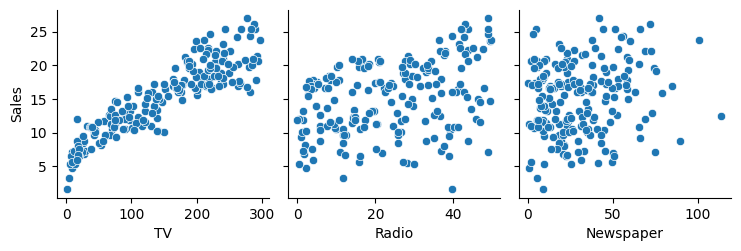

In [3]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

<Axes: xlabel='TV', ylabel='Frequency'>

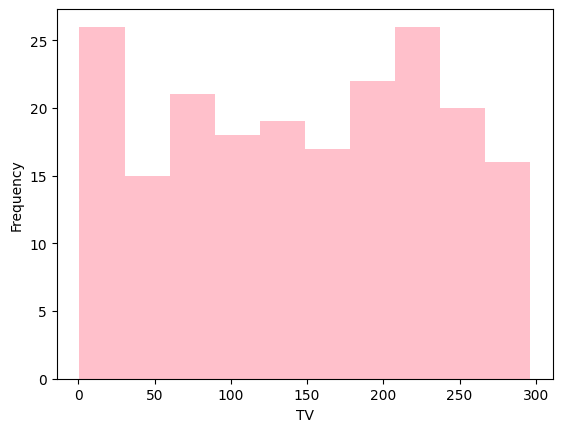

In [4]:
df['TV'].plot.hist(bins=10, color='pink', xlabel='TV')

<Axes: xlabel='RADIO', ylabel='Frequency'>

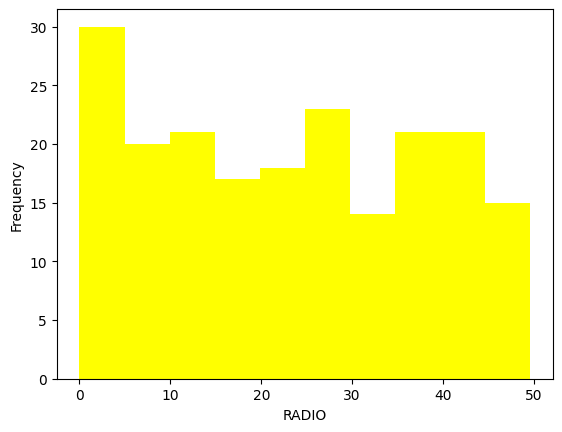

In [5]:
df['Radio'].plot.hist(bins=10, color='yellow', xlabel='RADIO')

<Axes: xlabel='NEWSPAPER', ylabel='Frequency'>

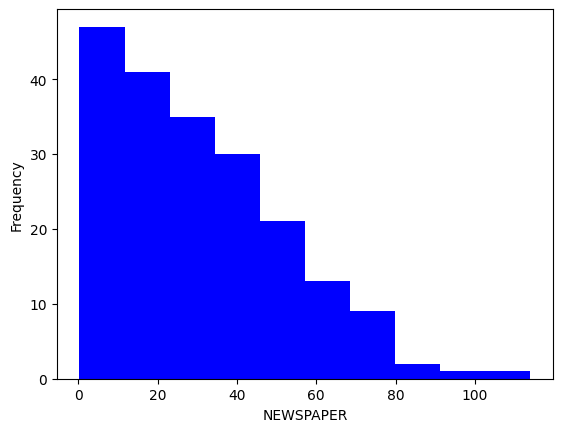

In [6]:
df['Newspaper'].plot.hist(bins=10, color='blue',xlabel='NEWSPAPER')

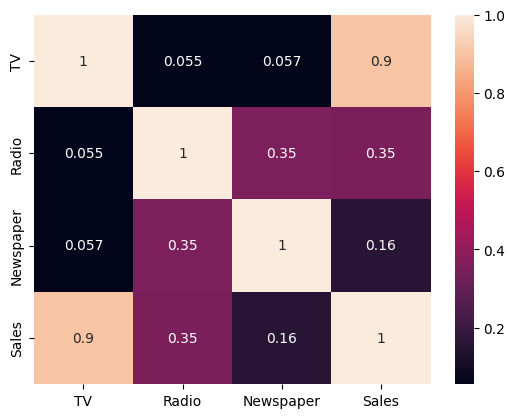

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
#Sales are highly correlated with TV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df[['TV']],df[['Sales']], test_size=0.3,random_state=0)
print(x_train)
print(y_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]
     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [9]:
print(x_test)
print(y_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3
     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
res=model.predict(x_test)
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [12]:
model.coef_

array([[0.05473199]])

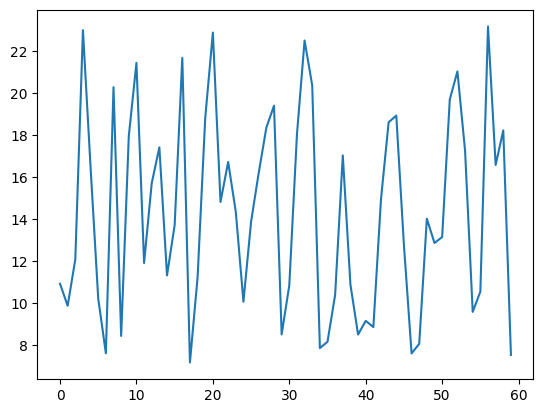

In [13]:
plt.plot(res)

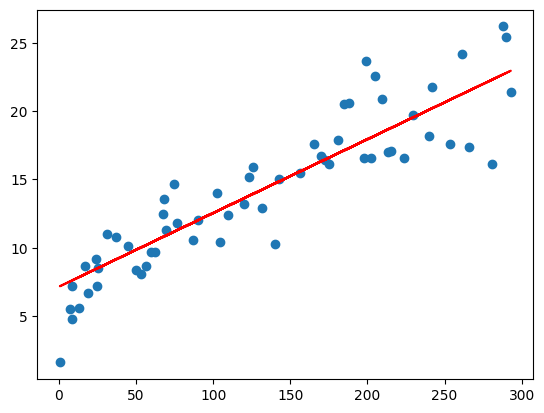

In [15]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 7.143+0.054*x_test, 'r')
plt.show()